# Cobra Survival

## Introduction

In [4]:
from cobsurv.models import CobraSurvival
import pandas as pd
from sklearn.model_selection import train_test_split
from sksurv.datasets import load_flchain

Lets load Dataset `flchain`

In [5]:
X , y = load_flchain()

Let's Preprocess the dataset

In [6]:
X_dummy = pd.get_dummies(X)
# remove rows with missing values
index_missing = X_dummy.isna().any(axis=1)
X_dummy = X_dummy.loc[~index_missing]
y = y[~index_missing]

Let's split the dataset into train and test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dummy.values, y, test_size=0.01 , random_state = 20 , shuffle = True)

Lets fit the model, with $\epsilon = 0.3$ and $\alpha = 4$ and using `trapz` as distance function, there are other
distance function available, like `euler` , `euclidean`, `shannon-jensen` etc.

In [8]:
cbr = CobraSurvival(epsilon = 0.11, alpha = 3, distance_function='trapz')
cbr.fit(X_train,y_train)

CobraSurvival(alpha=3, distance_function='trapz', epsilon=0.11)

We may get sometime, the number of quantile warning, is due to the fact that the $D_k$ and $D_l$ split is done by time quantile
and censoring, this happening that every quantile is not getting same proportion, so that it is reducing the
number of quantile to get the same proportion.

## Predict

The prediction from a cobra survival model is the probability of survival at a attribute `unique_sorted_times_l`
also with default machine option we can get `scikit-survival` base estimators.

In [9]:
cbr.predict(X_test)

array([[1.        , 1.        , 1.        , ..., 0.99037084, 0.99037084,
        0.99037084],
       [1.        , 1.        , 1.        , ..., 0.99051196, 0.99051196,
        0.99051196],
       [0.99688474, 0.99688474, 0.99376947, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.97820437, 0.97820437,
        0.97820437],
       [1.        , 1.        , 1.        , ..., 0.99212188, 0.99212188,
        0.99212188],
       [1.        , 1.        , 1.        , ..., 0.99036519, 0.99036519,
        0.99036519]])

## Plotting

We can plot the survival curve using, `plot` method, which take the covariates and the index of the observation
whose plot is needed, the plot is supported by `pycox.evaluation`, so only fifty index is supported, suppose we
want to plot `4`,`5` and `8`

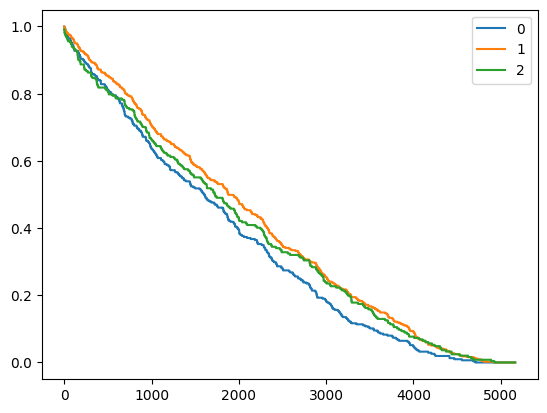

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

index = [4,5,8] # these are the observations for which we want to plot the survival curve
X_to_plot = X_test[index]
cbr.plot(X_to_plot , [0,1,2])
plt.show()

## Score

The Integrated Brier Score can be calculated using `score` method, when type is `concordance` it will return the
concordance index, when type is `ibs` it will return the integrated brier score.(defualt is `ibs`)

In [11]:
cbr.score(X_test, y_test)

0.03228505500485323

In [12]:
cbr.score(X_test,y_test, type = 'concordance')

0.956359102244389